Tài liệu này mang giấy phép Creative Commons Attribution (CC BY).
(c) Nguyễn Ngọc Sáng, Zhukovsky 12/2018.

[@SangVn](https://github.com/SangVn) [@VnCFD](https://vncfdgroup.wordpress.com/)

*Thực hành CFD với Python!*

# Bài 6. Phương trình Burgers (dòng chảy có nhớt)

Phương trình Burgers dạng đầy đủ:
$$\frac {\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}  \qquad (1)$$
Ở đây hạng tử nhớt có vai trò làm giảm biên độ sóng và ngăn chặn sự xuất hiện khả năng có nhiều nghiệm (hình 1).

<img src="Bai_6.png" width=300>
Để tìm nghiệm gần đúng của phương trình này ta sử dụng sơ đồ sai phân phải cho thời gian và sai phân trung tâm cho không gian:
$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

Ta có công thức xác định nghiệm:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{2\Delta x} (u_{i+1}^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

**Bài toán**

Ta sẽ xem quá trình lan truyền sóng xung kích với các điều kiện:
$$u(x, 0) = 1, -1 \leq x \leq 0; \quad u(x, 0) = 0, 0 < x \leq 1$$
$$u(-1, t) = 1, \quad u(1, t) = 0$$
Nghiệm chính xác của bài toán này có dạng:
$$u(x, t) = f(\xi) = 1/(1+e^{\xi/2\nu}), \xi = x-t/2$$

**Coding**

Ở bài này ta sẽ làm quen với thư viện `sympy` - hỗ trợ tính toán các biểu thức toán học biểu tượng (symbolic). Cái này giống với chức năng tương tự trong Matlab, Mathematica.
Để biến biểu thức toán học thành một hàm tính toán ta sẽ sử dụng module `lambdify`.

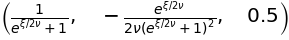

In [89]:
import numpy as np # gọi thư viện numpy
import sympy as sp # gọi thư viện sympy 
import matplotlib.pyplot as plt #gọi thư viện pyplot
from sympy.utilities.lambdify import lambdify #gọi module lambdify
from sympy import init_printing #

init_printing(use_latex=True) #in biểu thức dạng latex

xi, nu = sp.symbols('xi nu') #khai báo biểu tượng 
f = 1/(1 + sp.exp(xi/(2*nu)))    #khai báo biểu thức f - nghiệm chính xác 
fxi = lambdify((xi, nu), f)  #chuyển biểu thức f thành hàm fxi với biến là xi và nu

fdiff = f.diff(xi)  #dễ dàng tính được đạo hàm fxi theo xi - test 
f, fdiff, fxi(0, 1) #kiểm tra 

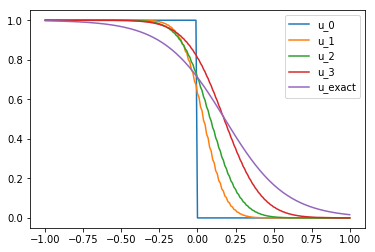

In [90]:
#thông số tính toán
nx = 201
dx = 2./(nx-1)
x = np.linspace(-1, 1, nx)

#bước thời gian
r = 0.05
dt = r*dx 

#điều kiện ban đầu
u0 = np.zeros(nx)
u0[:int(1./dx)] = 1

#nghiệm chính xác, nu - độ nhớt
def u_exact(nu, t):
    xi = x - t/2
    return np.array([fxi(xi_i, nu) for xi_i in xi]) 

#tìm nghiệm với biến đầu vào nu, và số bước thời gian nt
def solver(nu, nt):
    u = u0.copy()  #mảng u chứa nghiệm
    un = u0.copy() #mảng un chứa nghiệm tạm thời
    for n in range(nt):
        un = u.copy() #copy giá trị u - lưu giá trị ở bước hiện tại
        #tìm nghiệm ở bước thời gian tiếp theo
        u[1:-1] = un[1:-1] - dt/(2*dx)*un[1:-1]*(un[2:] - un[0:-2]) +\
                  nu*dt/dx**2*(un[2:] - 2*un[1:-1] + un[0:-2])
        u[0] = 1
        u[-1] = 0
    return u

#xét trường hợp nu = 0.1
nu = .1
u_1 = solver(nu, 180)
u_2 = solver(nu, 360)
u_3 = solver(nu, 720)
u_ext = u_exact(nu, 720*dt)

plt.plot(x, u0, label='u_0')
plt.plot(x, u_1, label='u_1')
plt.plot(x, u_2, label='u_2')
plt.plot(x, u_3, label='u_3')
plt.plot(x, u_ext, label='u_exact')
plt.legend()
plt.show()

Ta thấy, theo thời gian nghiệm càng mượt mà hơn do tính nhớt của phương trình, với độ nhớt $\nu$ lớn thành phần nhớt đóng vai trò chủ đạo. Sơ đồ cho nghiệm kém chính xác.

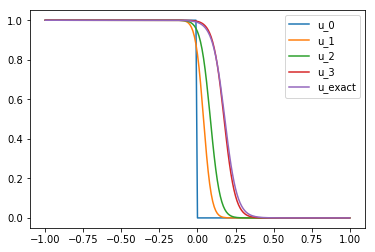

In [91]:
#trường hợp nu = 0.02
nu = .02
u_1 = solver(nu, 180)
u_2 = solver(nu, 360)
u_3 = solver(nu, 720)
u_ext = u_exact(nu, 720*dt)

plt.plot(x, u0, label='u_0')
plt.plot(x, u_1, label='u_1')
plt.plot(x, u_2, label='u_2')
plt.plot(x, u_3, label='u_3')
plt.plot(x, u_ext, label='u_exact')
plt.legend()
plt.show()

Rõ ràng khi $\nu$ nhỏ, phương trình Burgers có nhớt dần chuyển thành dạng không nhớt (bài 5), thành phần 'chuyển dịch' đóng vai trò chủ đạo. Sơ đồ cho nghiệm khá chính xác.

## [Bài 7. Phương trình Burgers hai chiều](Bai_7.ipynb)